In [31]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from textblob import TextBlob
import feature_engineering

In [6]:
posts_file_path = os.path.join('..', 'data', 'raw', 'BigQuery', "TD_May19.csv")
posts_df = pd.read_csv(posts_file_path)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (5,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# #todo for later - this code worked once, for some reason, but due to jupyter non-reproducibility I couldn't get it to run again. The result is below, TD_all.csv.
# #for now I am going to use the may data to engineer features.
# posts_df = pd.DataFrame()
# for df_file in os.listdir(path = '../data/BigQuery')[:2]:
#     posts_file_path = os.path.join('..', 'data', 'BigQuery', df_file)
#     tmp = pd.read_csv(posts_file_path, dtype = str)
#     posts_df = posts_df.append(tmp, ignore_index=True)
posts_df.head()

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
0,"But the other hundreds of horrendous, slanderi...",NaN,NaN,NaN,m1chael_b,NC,NaN,1557274147,t5_38unr,t3_bly9o8,t1_emsbsyy,1,1561714329,0,0,emsbvfd,The_Donald,NaN,NaN,north-carolina
1,Kinda looks like Heaven's waiting room.,NaN,NaN,NaN,grckalck,HRV,NaN,1557101132,t5_38unr,t3_bkqx5v,t3_bkqx5v,1,1561583795,0,0,emlmesx,The_Donald,NaN,NaN,croatia
2,You're all making me feel better about ending ...,NaN,NaN,NaN,igolfohio,OH,NaN,1557619243,t5_38unr,t3_bnen9a,t1_en5rxs3,74,1561946604,0,0,en617vm,The_Donald,NaN,NaN,ohio
3,"In this case, deliberately falsely accusing so...",NaN,NaN,NaN,mjacobs19,IN,NaN,1557620605,t5_38unr,t3_bnaziu,t1_en4jjac,1,1561947825,0,0,en63svo,The_Donald,NaN,NaN,indiana
4,Always exercise your 2nd amendment. Problem s...,NaN,NaN,NaN,nealxg,VA,NaN,1556669432,t5_38unr,t3_bj5m54,t3_bj5m54,3,1559393573,0,0,em6n3dy,The_Donald,NaN,NaN,virginia


In [8]:
# posts_df.to_csv('../data/BigQuery/TD_all.csv')
# posts_df = pd.read_csv('../data/BigQuery/TD_all.csv')

In [9]:
posts_df.describe()

,score_hidden,archived,name,downs,created_utc,score,retrieved_on,controversiality,gilded,ups
count,0.0,0.0,0.0,0.0,8.763510e+05,876351.000000,8.763510e+05,876351.000000,876351.000000,0.0
mean,NaN,NaN,NaN,NaN,1.558017e+09,8.724293,1.562345e+09,0.009350,0.000097,NaN
std,NaN,NaN,NaN,NaN,7.765848e+05,30.467314,1.198671e+06,0.096243,0.012774,NaN
min,NaN,NaN,NaN,NaN,1.556669e+09,-120.000000,1.557622e+09,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.557351e+09,1.000000,1.561764e+09,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,1.558024e+09,3.000000,1.562671e+09,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,1.558675e+09,7.000000,1.563199e+09,0.000000,0.000000,NaN
max,NaN,NaN,NaN,NaN,1.559347e+09,2760.000000,1.563954e+09,1.000000,8.000000,NaN


In [10]:
pd.set_option('display.max_columns', None)
posts_df.head()

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class
0,"But the other hundreds of horrendous, slanderi...",NaN,NaN,NaN,m1chael_b,NC,NaN,1557274147,t5_38unr,t3_bly9o8,t1_emsbsyy,1,1561714329,0,0,emsbvfd,The_Donald,NaN,NaN,north-carolina
1,Kinda looks like Heaven's waiting room.,NaN,NaN,NaN,grckalck,HRV,NaN,1557101132,t5_38unr,t3_bkqx5v,t3_bkqx5v,1,1561583795,0,0,emlmesx,The_Donald,NaN,NaN,croatia
2,You're all making me feel better about ending ...,NaN,NaN,NaN,igolfohio,OH,NaN,1557619243,t5_38unr,t3_bnen9a,t1_en5rxs3,74,1561946604,0,0,en617vm,The_Donald,NaN,NaN,ohio
3,"In this case, deliberately falsely accusing so...",NaN,NaN,NaN,mjacobs19,IN,NaN,1557620605,t5_38unr,t3_bnaziu,t1_en4jjac,1,1561947825,0,0,en63svo,The_Donald,NaN,NaN,indiana
4,Always exercise your 2nd amendment. Problem s...,NaN,NaN,NaN,nealxg,VA,NaN,1556669432,t5_38unr,t3_bj5m54,t3_bj5m54,3,1559393573,0,0,em6n3dy,The_Donald,NaN,NaN,virginia


In [11]:
posts_df['created_date'] = pd.to_datetime(
    posts_df['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(int(x))),
    errors='coerce')

posts_df['created_date'] = posts_df['created_date'].dt.date

In [12]:
print(posts_df.created_date.min())
print(posts_df.created_date.max())

2019-04-30
2019-05-31


In [13]:
# posts_df.set_index('created_date', inplace=True)
posts_df.rename(columns={'body':'selftext'}, inplace=True)

In [14]:
# posts_df['post_type'] = posts_df['selftext'].apply(lambda x: (x not in ['[removed]', '']) & (~pd.isnull(x)))
posts_df['post_type'] = np.select(
    [
        posts_df['selftext'] == '[removed]', 
        posts_df['selftext'] == '[deleted]', 
        posts_df['selftext'] == '',
        pd.isna(posts_df['selftext']) 
    ], 
    [
        'removed', 
        'deleted',
        'blank',
        'nan'
    ], 
    default='extant'
)
posts_df[['post_type', 'selftext']]

,post_type,selftext
0,extant,"But the other hundreds of horrendous, slanderi..."
1,extant,Kinda looks like Heaven's waiting room.
2,extant,You're all making me feel better about ending ...
3,extant,"In this case, deliberately falsely accusing so..."
4,extant,Always exercise your 2nd amendment. Problem s...
...,...,...
876346,extant,"Young Krapistein. I've seen that movie, too!"
876347,extant,File a bar complaint. Admitting to contempt fo...
876348,extant,When do we start watering the tree of liberty?
876349,extant,THIS!!! They kept repeating the same talking p...


In [15]:
posts_df.groupby('post_type')['post_type'].count() #majority are either removed or blank... need to investigate this for sure

post_type
deleted     46800
extant     798370
nan           396
removed     30785
Name: post_type, dtype: int64

In [16]:
#again a huge proportion are blank... the subreddit is banned so technically none of them are publically visible anymore, is this posts that were removed prior to being banned?
posts_by_date = posts_df.groupby('created_date')['post_type'].value_counts().unstack()
posts_by_date.fillna(0, inplace=True)
posts_by_date.head()

post_type,deleted,extant,nan,removed
created_date,,,,
2019-04-30,413.0,6837.0,2.0,295.0
2019-05-01,1508.0,30379.0,8.0,902.0
2019-05-02,1409.0,26958.0,2.0,894.0
2019-05-03,1654.0,25099.0,2.0,978.0
2019-05-04,1216.0,20570.0,0.0,756.0


<AxesSubplot:xlabel='created_date'>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


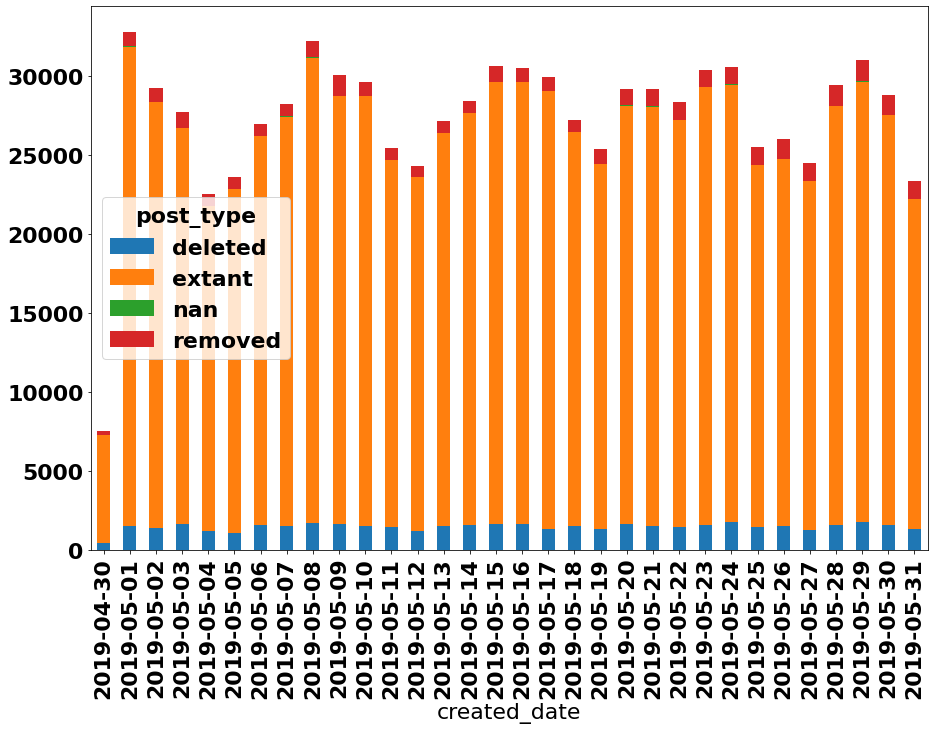

In [17]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = (15,10)

posts_by_date.plot(kind='bar', stacked=True)


In [18]:
extant_posts = posts_df[posts_df['post_type'] == 'extant']
extant_posts['selftext']

0         But the other hundreds of horrendous, slanderi...
1                   Kinda looks like Heaven's waiting room.
2         You're all making me feel better about ending ...
3         In this case, deliberately falsely accusing so...
4         Always exercise  your 2nd amendment. Problem s...
                                ...                        
876346         Young Krapistein. I've seen that movie, too!
876347    File a bar complaint. Admitting to contempt fo...
876348       When do we start watering the tree of liberty?
876349    THIS!!! They kept repeating the same talking p...
876350    Bill coming aboard her plane was a power move....
Name: selftext, Length: 798370, dtype: object

In [19]:
curses = TextBlob('Fuck this bullshit. People are assholes and everything they say doesnt mean shit.')
negative_subjective = TextBlob('I hate everything and everything sucks. Everyone is out to get me and its not fair, waaaaaaa')
negative_objective = TextBlob('Country has recorded more than 390,000 new infections and 3,689 deaths over the past 24-hour period')
positive_subjective = TextBlob('I love everything and everything is great. Everyone loves me and and the sun is shining')
positive_objective = TextBlob('Country has added more than 390,000 new jobs and GDP has increased 3 percent per year for a decade')

(curses.sentiment, negative_subjective.sentiment, negative_objective.sentiment, positive_subjective.sentiment, positive_objective.sentiment)

(Sentiment(polarity=-0.3041666666666667, subjectivity=0.6958333333333334),
 Sentiment(polarity=-0.4833333333333334, subjectivity=0.7000000000000001),
 Sentiment(polarity=0.12878787878787878, subjectivity=0.40151515151515155),
 Sentiment(polarity=0.65, subjectivity=0.675),
 Sentiment(polarity=0.3181818181818182, subjectivity=0.4772727272727273))

Polarity ranges from (-1, 1) and subjectivity from (0, 1), so not sure about the ranges but in general the sentiment seems to track relatively well - the negative ones are very different from the positive, but swear words don't seem to immediately indicate negativity - we'll see if thats an issue. Now let's get a post_length feature and polarity/sentiment for each post, so that we can see the extremes in TRP and see if it makes any sense. 

In [20]:
sentiment = pd.DataFrame(extant_posts.loc[:,'selftext'].apply(lambda text: tuple(TextBlob(text).sentiment)).tolist())
sentiment.index = extant_posts.index
sentiment.rename(columns = {0:'sentiment', 1:'objectivity'}, inplace = True)
sentiment.head()

,sentiment,objectivity
0,-0.175,0.558333
1,0.000,0.000000
2,0.150,0.650000
3,0.050,0.716667
4,0.000,0.000000


In [21]:
extant_posts = pd.merge(extant_posts, sentiment, left_index= True, right_index=True)
extant_posts.head()

,selftext,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type,sentiment,objectivity
0,"But the other hundreds of horrendous, slanderi...",NaN,NaN,NaN,m1chael_b,NC,NaN,1557274147,t5_38unr,t3_bly9o8,t1_emsbsyy,1,1561714329,0,0,emsbvfd,The_Donald,NaN,NaN,north-carolina,2019-05-07,extant,-0.175,0.558333
1,Kinda looks like Heaven's waiting room.,NaN,NaN,NaN,grckalck,HRV,NaN,1557101132,t5_38unr,t3_bkqx5v,t3_bkqx5v,1,1561583795,0,0,emlmesx,The_Donald,NaN,NaN,croatia,2019-05-05,extant,0.000,0.000000
2,You're all making me feel better about ending ...,NaN,NaN,NaN,igolfohio,OH,NaN,1557619243,t5_38unr,t3_bnen9a,t1_en5rxs3,74,1561946604,0,0,en617vm,The_Donald,NaN,NaN,ohio,2019-05-11,extant,0.150,0.650000
3,"In this case, deliberately falsely accusing so...",NaN,NaN,NaN,mjacobs19,IN,NaN,1557620605,t5_38unr,t3_bnaziu,t1_en4jjac,1,1561947825,0,0,en63svo,The_Donald,NaN,NaN,indiana,2019-05-11,extant,0.050,0.716667
4,Always exercise your 2nd amendment. Problem s...,NaN,NaN,NaN,nealxg,VA,NaN,1556669432,t5_38unr,t3_bj5m54,t3_bj5m54,3,1559393573,0,0,em6n3dy,The_Donald,NaN,NaN,virginia,2019-04-30,extant,0.000,0.000000


In [22]:
#let's drop some of the less useful columns (All NANs)
extant_posts.describe()

,score_hidden,archived,name,downs,created_utc,score,retrieved_on,controversiality,gilded,ups,sentiment,objectivity
count,0.0,0.0,0.0,0.0,7.983700e+05,798370.000000,7.983700e+05,798370.000000,798370.000000,0.0,798370.000000,798370.000000
mean,NaN,NaN,NaN,NaN,1.558012e+09,9.055817,1.562338e+09,0.008407,0.000106,NaN,0.053820,0.366161
std,NaN,NaN,NaN,NaN,7.754963e+05,31.136981,1.201772e+06,0.091304,0.013383,NaN,0.287855,0.319634
min,NaN,NaN,NaN,NaN,1.556669e+09,-120.000000,1.557622e+09,0.000000,0.000000,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.557349e+09,1.000000,1.561762e+09,0.000000,0.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.558020e+09,3.000000,1.562666e+09,0.000000,0.000000,NaN,0.000000,0.395000
75%,NaN,NaN,NaN,NaN,1.558667e+09,7.000000,1.563191e+09,0.000000,0.000000,NaN,0.168750,0.600000
max,NaN,NaN,NaN,NaN,1.559347e+09,2760.000000,1.563954e+09,1.000000,8.000000,NaN,1.000000,1.000000


In [23]:
extant_posts.drop(['score_hidden', 'archived', 'name', 'downs', 'ups', 'subreddit','post_type','subreddit_id','link_id','retrieved_on'], axis = 1, inplace=True)

In [24]:
extant_posts['distinguished'].replace({'moderator':1, np.nan:0}, inplace=True)
extant_posts.rename(columns={'distinguished':'moderator'}, inplace=True)

In [25]:
extant_posts['created_date'] = pd.to_datetime(
    extant_posts['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(int(x))),
    errors='coerce')

In [26]:
extant_posts['created_time'] = extant_posts['created_date'].dt.time #maybe late night users are different
extant_posts['created_date'] = extant_posts['created_date'].dt.date
extant_posts.drop(['created_utc'], axis = 1, inplace=True)

In [27]:
extant_posts.head()

,selftext,author,author_flair_text,parent_id,score,controversiality,gilded,id,moderator,author_flair_css_class,created_date,sentiment,objectivity,created_time
0,"But the other hundreds of horrendous, slanderi...",m1chael_b,NC,t1_emsbsyy,1,0,0,emsbvfd,0,north-carolina,2019-05-07,-0.175,0.558333,19:09:07
1,Kinda looks like Heaven's waiting room.,grckalck,HRV,t3_bkqx5v,1,0,0,emlmesx,0,croatia,2019-05-05,0.000,0.000000,19:05:32
2,You're all making me feel better about ending ...,igolfohio,OH,t1_en5rxs3,74,0,0,en617vm,0,ohio,2019-05-11,0.150,0.650000,19:00:43
3,"In this case, deliberately falsely accusing so...",mjacobs19,IN,t1_en4jjac,1,0,0,en63svo,0,indiana,2019-05-11,0.050,0.716667,19:23:25
4,Always exercise your 2nd amendment. Problem s...,nealxg,VA,t3_bj5m54,3,0,0,em6n3dy,0,virginia,2019-04-30,0.000,0.000000,19:10:32


In [32]:
#now for our features gleaned from feature_engineering.py
keyword_builder_path = os.path.join('..', 'util', "keyword_builder.txt")
kp = feature_engineering.flashtext_init('keyword_builder.txt')

OSError: Invalid file path keyword_builder.txt

In [25]:
counted_keywords = extant_posts['selftext'].apply(lambda text: feature_engineering.flashtext_count(kp, text))

In [26]:
keyword_df = counted_keywords.apply(pd.Series)
keyword_df.fillna(0, inplace=True)

In [27]:
extant_posts = pd.merge(extant_posts, keyword_df, left_index= True, right_index=True)

In [28]:
extant_posts['log10_nword'] = extant_posts['selftext'].apply(lambda text: feature_engineering.log_nword(text))

In [29]:
extant_posts.head()

,selftext,author,author_flair_text,parent_id,score,controversiality,gilded,id,moderator,author_flair_css_class,created_date,sentiment,objectivity,created_time,Republicans,Right,News,Left,Tech,Ideals,Democrats,Censorship,log10_nword
0,"But the other hundreds of horrendous, slanderi...",m1chael_b,NC,t1_emsbsyy,1,0,0,emsbvfd,0,north-carolina,2019-05-07,-0.175,0.558333,17:09:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301030
1,Kinda looks like Heaven's waiting room.,grckalck,HRV,t3_bkqx5v,1,0,0,emlmesx,0,croatia,2019-05-05,0.000,0.000000,17:05:32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.778151
2,You're all making me feel better about ending ...,igolfohio,OH,t1_en5rxs3,74,0,0,en617vm,0,ohio,2019-05-11,0.150,0.650000,17:00:43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301030
3,"In this case, deliberately falsely accusing so...",mjacobs19,IN,t1_en4jjac,1,0,0,en63svo,0,indiana,2019-05-11,0.050,0.716667,17:23:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342423
4,Always exercise your 2nd amendment. Problem s...,nealxg,VA,t3_bj5m54,3,0,0,em6n3dy,0,virginia,2019-04-30,0.000,0.000000,17:10:32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845098


In [30]:
extant_posts.describe()

,score,controversiality,gilded,moderator,sentiment,objectivity,Republicans,Right,News,Left,Tech,Ideals,Democrats,Censorship,log10_nword
count,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000,798370.000000
mean,9.055817,0.008407,0.000106,0.003093,0.053820,0.366161,0.097043,0.026981,0.009979,0.058712,0.033498,0.007317,0.050881,0.017067,1.092830
std,31.136981,0.091304,0.013383,0.055525,0.287855,0.319634,0.442845,0.269482,0.125754,0.291166,0.238182,0.111409,0.323941,0.158566,0.490149
min,-120.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.778151
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.395000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.113943
75%,7.000000,0.000000,0.000000,0.000000,0.168750,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.414973
max,2760.000000,1.000000,8.000000,1.000000,1.000000,1.000000,78.000000,168.000000,18.000000,17.000000,22.000000,13.000000,120.000000,12.000000,3.216957


In [33]:
extant_posts.to_csv('../data/BigQuery/TD_May19_Processed.csv')